# Predikce zřízení kreditní karty
### Autoři práce:
- Mariia Stepanova 
- Illya Dragan
- Jan Doleček 
- Artem Sorokin 

Pro tuto práci jsme zvolili dataset **DATA3**. Tento dataset se skládá z 10 tisíc řádků a 20 atributů popisujících základní vlastnosti a chování klientů banky.

Cílem práce je vytvořit binární klasifikační model s cílovým atributem `New_Credit_Card_Flag`.

In [1]:
# import knihoven
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# nastavení stylu pro celý notebook 
sns.set_style('darkgrid')
sns.set_palette(palette=['blueviolet', 'navy'])

In [3]:
# import dat 
data = pd.read_csv('Banking Prediction Sample 10K.csv', sep = ';', index_col = 'Customer_ID')

In [4]:
# 10 000 objektů a 19 atributů 
data.shape

(10000, 19)

In [5]:
data.head()

,Gender,Age,Tenure,Saving_Amount,Current_Amount,Time_Deposits_Amount,Funds_Amount,Stocks_Amount,Bank_Assurance_Amount,Life_Assurance_Amount,Business_Loan_Amount,Home_Loan_Amount,Consumer_Loan_Amount,Branch_Transactions,ATM_Transactions,Phone_Transactions,Internet_Transactions,Standing_Orders,New_Credit_Card_Flag
Customer_ID,,,,,,,,,,,,,,,,,,,
1,M,52,49,0.000000,0.000000,0.0,0.0,0.0,139.194286,0.000000,0.0,20044.611429,0.000000,0,0,0,0,0,0
2,F,59,49,0.000000,0.000000,0.0,0.0,0.0,0.000000,32.205714,0.0,0.000000,2430.224286,4,3,0,0,0,0
3,M,52,49,18.825714,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0,0,0,0,0,0
4,M,54,49,0.000000,603.791429,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,7,7,0,0,12,0
5,F,61,49,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,2.720000,0,0,0,0,0,0


In [6]:
# Přidání šumu z normálního rozdělení k proměnné Age pro účely lepší vizualizace.
age = data['Age']
noise = np.random.normal(0.5, 0.12, size=len(data))
age_jitter = age + noise

data['age_jitter'] = age_jitter

In [7]:
# Vytváření souhrnných atributů
data['Total_Amount'] = (data['Saving_Amount'] 
                        + data['Current_Amount'] 
                        + data['Time_Deposits_Amount'] 
                        + data['Funds_Amount'] 
                        + data['Stocks_Amount'] 
                        + data['Bank_Assurance_Amount'] 
                        + data['Life_Assurance_Amount'] 
                        + data['Business_Loan_Amount'] 
                        + data['Home_Loan_Amount'] 
                        + data['Consumer_Loan_Amount'])

data['Total_Transactions'] = (data['Branch_Transactions'] 
                               + data ['ATM_Transactions'] 
                               + data['Phone_Transactions'] 
                               + data['Internet_Transactions'] 
                               + data['Standing_Orders'])

## Deskriptivní statistika

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Gender                 10000 non-null  object 
 1   Age                    10000 non-null  int64  
 2   Tenure                 10000 non-null  int64  
 3   Saving_Amount          10000 non-null  float64
 4   Current_Amount         10000 non-null  float64
 5   Time_Deposits_Amount   10000 non-null  float64
 6   Funds_Amount           10000 non-null  float64
 7   Stocks_Amount          10000 non-null  float64
 8   Bank_Assurance_Amount  10000 non-null  float64
 9   Life_Assurance_Amount  10000 non-null  float64
 10  Business_Loan_Amount   10000 non-null  float64
 11  Home_Loan_Amount       10000 non-null  float64
 12  Consumer_Loan_Amount   10000 non-null  float64
 13  Branch_Transactions    10000 non-null  int64  
 14  ATM_Transactions       10000 non-null  int64  
 15  Ph

- Dataset neobsahuje žádné chybějící hodnoty.
- V datasetu je pouze jeden kategoriální atribut (Gender). 

In [9]:
# Rozdělení datasetu podle cílového atributu

new_credit_0 = len(data[data['New_Credit_Card_Flag'] == 0])
new_credit_1 = len(data[data['New_Credit_Card_Flag'] == 1])

procento_0 = new_credit_0 / (new_credit_0 + new_credit_1)
procento_1 = new_credit_1 / (new_credit_0 + new_credit_1)
print(f'Podíl zákazníků bez kreditní karty: {procento_0}\nPodíl zákazníků s kreditní kartou: {procento_1}')

Podíl zákazníků bez kreditní karty: 0.9127
Podíl zákazníků s kreditní kartou: 0.0873


---

#### Podíváme se na průměrné hodnoty atributů při seskupování podle cílového atributu:

In [10]:
data.groupby('New_Credit_Card_Flag').mean()

,Age,Tenure,Saving_Amount,Current_Amount,Time_Deposits_Amount,Funds_Amount,Stocks_Amount,Bank_Assurance_Amount,Life_Assurance_Amount,Business_Loan_Amount,Home_Loan_Amount,Consumer_Loan_Amount,Branch_Transactions,ATM_Transactions,Phone_Transactions,Internet_Transactions,Standing_Orders,age_jitter,Total_Amount,Total_Transactions
New_Credit_Card_Flag,,,,,,,,,,,,,,,,,,,,
0,50.321573,92.197874,2173.686692,504.299628,2158.321913,2124.019375,1516.329264,15.887379,3.187577,450.269832,1837.047458,576.023949,2.887696,2.716446,0.029363,0.005259,0.251013,50.821493,11359.073067,5.889778
1,46.490263,85.365407,1263.168200,551.815337,729.015140,1509.452360,624.956998,23.407814,7.696091,1872.381098,2453.164127,1720.551744,6.390607,5.750286,0.247423,0.478809,0.335624,46.995220,10755.608909,13.202749


Největší rozdíly jsou:
- Zákazníci bez kreditní karty mají na **spořicím účtu** v průměru o 172% více úspor než zákazníci bez kreditní karty. 
- Klienti bez kreditní karty mají na **termínovaném účtu** v průměru o 296% více úspor než klienti bez kreditní karty. 
- Zákazníci s kreditní kartou raději využívají všechny typy *úvěrů*, které banka nabízí.
- Zákazníci s kreditní kartou mají v průměru větší frekvenci různých *interakcí* s bankou.


----

#### Doba, po kterou je osoba klientem banky (Tenure)

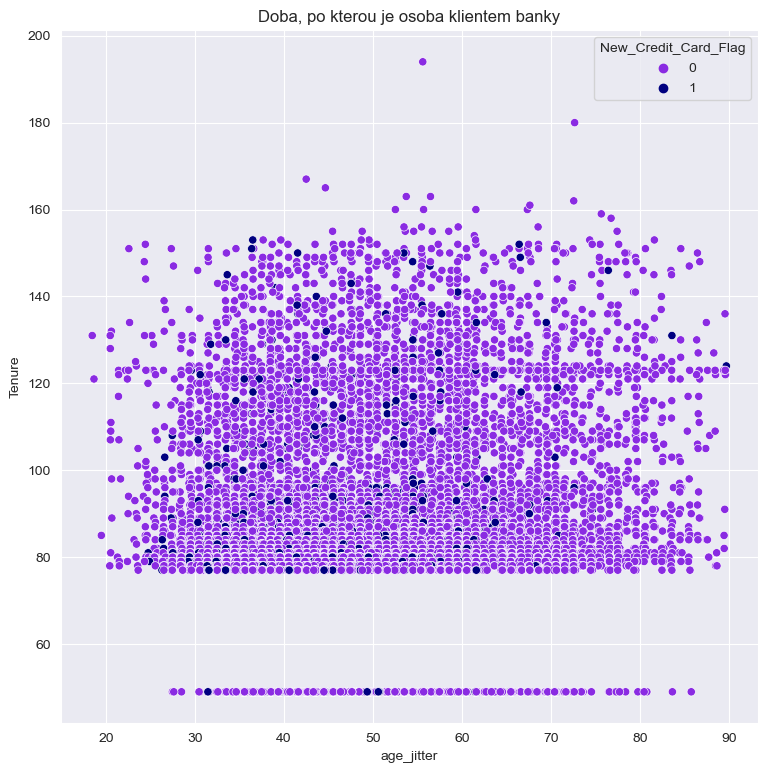

In [11]:
plt.figure(figsize = (9, 9))
sns.scatterplot(data = data, x = 'age_jitter', y = "Tenure", hue = 'New_Credit_Card_Flag')
plt.title('Doba, po kterou je osoba klientem banky')

#plt.savefig('Tenure_Age.png', dpi = 1000)
plt.show()

In [12]:
# Noví zákazníci mezi současností a obdobím před 50 měsíci. 
data[data['Tenure'] < 50].shape[0]

1009

V tomto grafu jsou fialovými body znázorněni zákazníci *bez kreditní karty* a tmavě modrými body zákazníci *s kreditní kartou*. Na ose Y je atribut **Tenure** (počet měsíců, během kterých je osoba klientem banky). Na ose X je atribut **Age** se šumem.

Z tohoto grafu vyplývají následující zjištění: 
- Banka zahájila aktivní činnost přibližně před 152 měsíci.  
- Zhruba před 121 až 122 měsíci vidíme velký nárůst klientů, což svědčí o úspěšné reklamní kampani v té době. 
- Nejvíce klientů přišlo do banky v rozmezí 100 až 77 měsíců. V tomto období byl zaznamenán nejstabilnější a nejsilnější růst počtu klientů. 
- Je patrné, že v období 100 až 90 měsíců narůstal hlavně počet klientů ve věkové skupině do 60 let, ale později banka rozšířila reklamní kampaň i na starší klienty. 

Dále vidíme věci, které je poměrně obtížné vysvětlit:
- Od 77 do 50 měsíců nepřišel do banky ani jeden nový zákazník.
- Za jeden měsíc přibylo 1009 nových zákazníků před 49 měsíci. 
- Poslední nový zákazník byl před 48 měsíci.

In [13]:
# odstranění atributu, protože již není potřebný
data = data.drop(columns = ['age_jitter'])

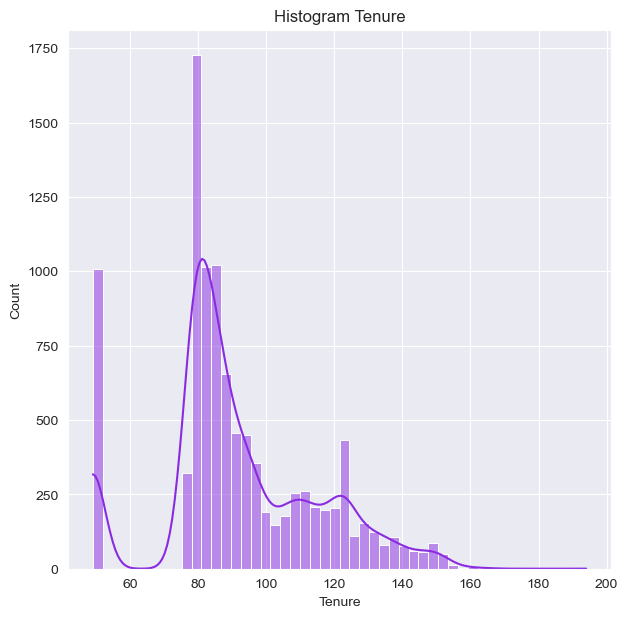

In [14]:
# Tenure
plt.figure(figsize = (7, 7))
sns.histplot(data = data, x = 'Tenure', bins = 50, kde = True)
plt.title('Histogram Tenure')
# plt.savefig('Distribuce_Tenure.png', dpi = 1000)
plt.show()

Histogram poskytuje jiný pohled na tento atribut.

----

### Gender

In [15]:
# Mužů je téměř dvakrát více než žen.
data.groupby('Gender')['New_Credit_Card_Flag'].count()

Gender
F    3623
M    6377
Name: New_Credit_Card_Flag, dtype: int64

#### Podívejme se na věkové rozdělení obou pohlaví:

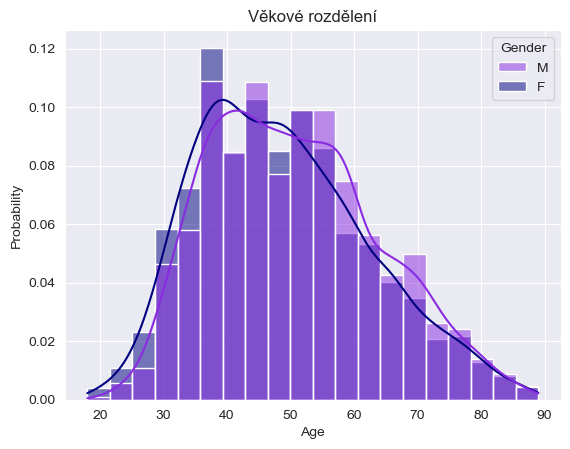

In [16]:
sns.histplot(data = data, x = 'Age', hue = 'Gender',
             bins = 20, stat = 'probability',
             common_norm = False, kde = True,
             multiple = 'layer')

plt.title('Věkové rozdělení')
# plt.savefig('Věkové rozdělení.png', dpi = 1000)
plt.show()

Pro tuto vizualizaci jsme použili normalizaci, abychom získali srozumitelnější obraz. 

Rozdělení vypadají velmi podobně.  
- Rozdělení jsou zešikmeny doprava. Z toho lze vyvodit, že tato banka je atraktivnější pro zákazníky mladší 50 - 55 let.
- Ženy jsou v průměru mladší než muži. 

---

## Detailní zkoumání jednotlivých atributů a jejich vztahu k dispozici kreditní karty 

Vytvoříme funkci, pomocí které se blíže podíváme na jednotlivé atributy rozdělení do dvou skupin:
1. skupina, která **nevyužívá** určitou bankovní službu
2. skupina, která **využívá** určitou bankovní službu 

In [17]:
def func(column_name):
    data_0 = data[data[column_name] == 0]
    data_not_0 = data[data[column_name] != 0]
    print(f'Pocet pozorovani kde {column_name} = 0: {data_0.shape[0]}')
    print(f'pocet pozorovani kde {column_name} != 0: {data_not_0.shape[0]}')
    
    celek_0 = data_0.shape[0]
    celek_not_0 = data_not_0.shape[0]
    cards_0 = data_0['New_Credit_Card_Flag'].sum()
    cards_not_0 = data_not_0['New_Credit_Card_Flag'].sum()

    print(f'Procento kreditnich karet ve skupine {column_name} = 0: {round((cards_0 / celek_0 * 100), 2)} %')
    print(f'procento kreditnich karet ve skupine {column_name} != 0: {round((cards_not_0 / celek_not_0 * 100),2)} %')

In [18]:
for i in [3, 4, 5, 6, 7, 8, 9, 10, 11, 12]:
    func(data.columns[i])
    print('#' * 30)

Pocet pozorovani kde Saving_Amount = 0: 3419
pocet pozorovani kde Saving_Amount != 0: 6581
Procento kreditnich karet ve skupine Saving_Amount = 0: 12.43 %
procento kreditnich karet ve skupine Saving_Amount != 0: 6.81 %
##############################
Pocet pozorovani kde Current_Amount = 0: 7984
pocet pozorovani kde Current_Amount != 0: 2016
Procento kreditnich karet ve skupine Current_Amount = 0: 8.58 %
procento kreditnich karet ve skupine Current_Amount != 0: 9.33 %
##############################
Pocet pozorovani kde Time_Deposits_Amount = 0: 9549
pocet pozorovani kde Time_Deposits_Amount != 0: 451
Procento kreditnich karet ve skupine Time_Deposits_Amount = 0: 8.94 %
procento kreditnich karet ve skupine Time_Deposits_Amount != 0: 4.21 %
##############################
Pocet pozorovani kde Funds_Amount = 0: 9140
pocet pozorovani kde Funds_Amount != 0: 860
Procento kreditnich karet ve skupine Funds_Amount = 0: 9.02 %
procento kreditnich karet ve skupine Funds_Amount != 0: 5.7 %
#########

První dva řádky ukazují absolutní počet klientů, kteří službu využívají nebo nevyužívají. Další dva řádky odpovídají za procento kreditních karet v těchto skupinách.

Patrné rozdíly jsou:
- `Saving_Amount` 
  - 12.4 % těch, kteří **nevyužívají** danou bankovní službu, mají kreditní kartu.
  - 6.8 % těch, kteří **využívají** danou bankovní službu, mají kreditní kartu.
- `Bank_Assurance_Amount` 
  - 8.5 % těch, kteří **nevyužívají** danou bankovní službu, mají kreditní kartu.
  - 11.3 % těch, kteří **využívají** danou bankovní službu, mají kreditní kartu.
- `Life_Assurance_Amount`
  - 8.4 % těch, kteří **nevyužívají** danou bankovní službu, mají kreditní kartu.
  - 22.1 % těch, kteří **využívají** danou bankovní službu, mají kreditní kartu.
- `Business_Loan_Amount`
  - 8.5 % těch, kteří **nevyužívají** danou bankovní službu, mají kreditní kartu.
  - 15.2 % těch, kteří **využívají** danou bankovní službu, mají kreditní kartu.
- `Consumer_Loan_Amount`
  - 5.8 % těch, kteří **nevyužívají** danou bankovní službu, mají kreditní kartu.
  - 16.7 % těch, kteří **využívají** danou bankovní službu, mají kreditní kartu.

---

#### Saving_Amount

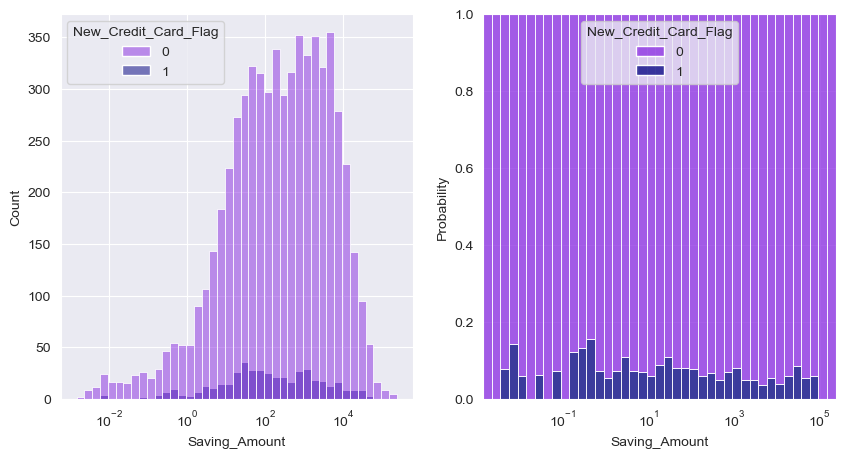

In [19]:
plt.figure(figsize = (10, 5))
plt.subplot(1, 2, 1)
sns.histplot(data = data[data['Saving_Amount'] > 0], x = "Saving_Amount", hue = "New_Credit_Card_Flag",
             log_scale = True, kde=False, multiple="layer", stat="count")
plt.subplot(1, 2, 2)
sns.histplot(data = data[data['Saving_Amount'] > 0], x = "Saving_Amount", hue = "New_Credit_Card_Flag",
             log_scale = True, kde=False, multiple="fill", stat="probability")
plt.show()

Pravý histogram ukazuje jasný klesající trend. Jinými slovy, **s růstem úspor klesá pravděpodobnost, že si klient založí kreditní kartu.** 

#### Tenure

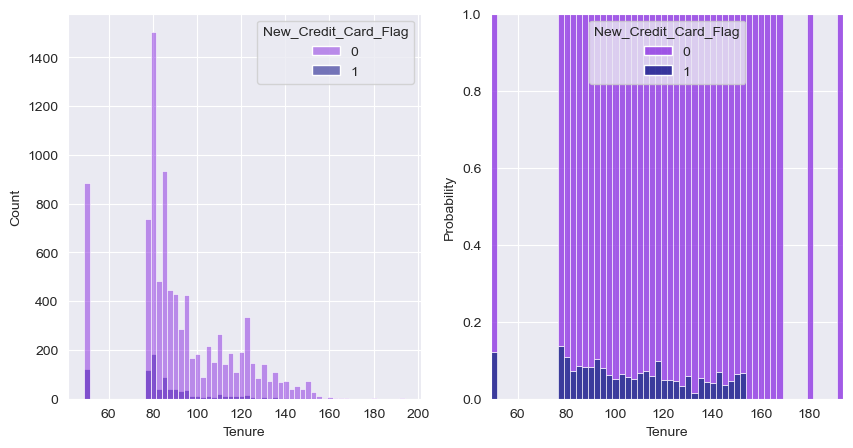

In [20]:
plt.figure(figsize = (10, 5))
plt.subplot(1, 2, 1)
sns.histplot(data = data, x = "Tenure", hue = "New_Credit_Card_Flag",
             log_scale = False, kde=False, multiple="layer", stat="count")
plt.subplot(1, 2, 2)
sns.histplot(data = data, x = "Tenure", hue = "New_Credit_Card_Flag",
             log_scale = False, kde=False, multiple="fill", stat="probability")

#plt.savefig('Tenure_histogramy.png', dpi = 1000)
plt.show()

Na tomto grafu opět vidíme negativní trend. Z toho vyplývá, že **banka postupem času zlepšila svou marketingovou kampaň na podporu kreditních karet. Anebo mají noví zákazníci přístup k atraktivnějším podmínkám pro kreditní karty.**

#### Consumer_Loan_Amount

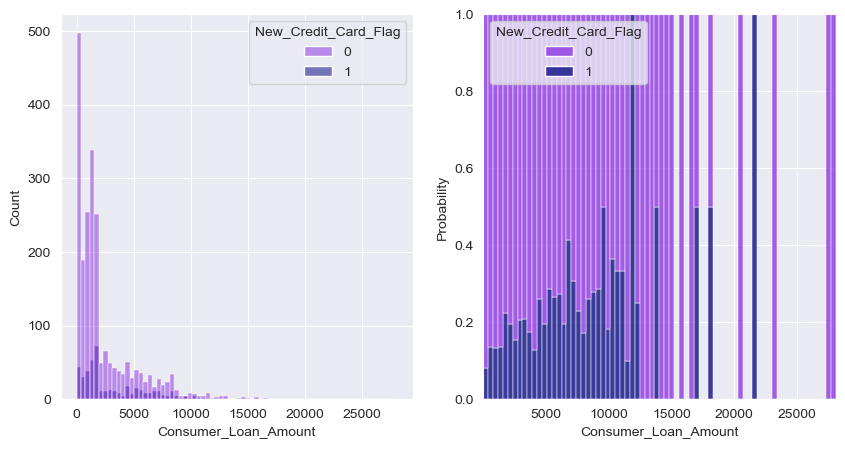

In [21]:
plt.figure(figsize = (10,5))
plt.subplot(1, 2, 1)
sns.histplot(data = data[data['Consumer_Loan_Amount'] > 0], x = "Consumer_Loan_Amount", hue = "New_Credit_Card_Flag",
             log_scale = False, kde=False, multiple="layer", stat="count")
plt.subplot(1, 2, 2)
sns.histplot(data = data[data['Consumer_Loan_Amount'] > 0], x = "Consumer_Loan_Amount", hue = "New_Credit_Card_Flag",
             log_scale = False, kde=False, multiple="fill", stat="probability")

# plt.savefig('ConsumerLoan_histogramy.png', dpi = 1000)
plt.show()

Zdá se, že atribut `Consumer_Loan_Amount` má na naši cílovou proměnnou nejsilnější vliv. V obou histogramech vidíme pozitivní korelaci mezi počtem kreditních karet a výší spotřebitelského úvěru. 

---

### Trasakce a standing_orders

Použijeme stejný přístup, ale nyní pro atributy popisující typ komunikace mezi klienty a bankou.

In [22]:
for i in [13, 14, 15, 16, 17]:
    func(data.columns[i])
    print('#' * 30)

Pocet pozorovani kde Branch_Transactions = 0: 4759
pocet pozorovani kde Branch_Transactions != 0: 5241
Procento kreditnich karet ve skupine Branch_Transactions = 0: 4.22 %
procento kreditnich karet ve skupine Branch_Transactions != 0: 12.82 %
##############################
Pocet pozorovani kde ATM_Transactions = 0: 7324
pocet pozorovani kde ATM_Transactions != 0: 2676
Procento kreditnich karet ve skupine ATM_Transactions = 0: 5.43 %
procento kreditnich karet ve skupine ATM_Transactions != 0: 17.75 %
##############################
Pocet pozorovani kde Phone_Transactions = 0: 9883
pocet pozorovani kde Phone_Transactions != 0: 117
Procento kreditnich karet ve skupine Phone_Transactions = 0: 8.39 %
procento kreditnich karet ve skupine Phone_Transactions != 0: 37.61 %
##############################
Pocet pozorovani kde Internet_Transactions = 0: 9857
pocet pozorovani kde Internet_Transactions != 0: 143
Procento kreditnich karet ve skupine Internet_Transactions = 0: 7.65 %
procento kreditnic

První dva řádky ukazují absolutní počet klientů, kteří službu využívají nebo nevyužívají. Další dva řádky odpovídají za procento kreditních karet v těchto skupinách.

Patrné rozdíly jsou:
- `Branch_Transactions` 
  - 4.2 % klientů, kteří tento typ komunikace **nepoužívají**, mají kreditní kartu.
  - 12.8 % klientů, kteří **používají** tento typ komunikace, mají kreditní kartu.
- `ATM_Transactions` 
  - 5.4 % klientů, kteří tento typ komunikace **nepoužívají**, mají kreditní kartu.
  - 17.8 % klientů, kteří **používají** tento typ komunikace, mají kreditní kartu.
- `Phone_Transactions`
  - 8.4 % klientů, kteří tento typ komunikace **nepoužívají**, mají kreditní kartu.
  - 37.6 % klientů, kteří **používají** tento typ komunikace, mají kreditní kartu.
- `Internet_Transactions`
  - 7.6 % klientů, kteří tento typ komunikace **nepoužívají**, mají kreditní kartu.
  - 83.2 % klientů, kteří **používají** tento typ komunikace, mají kreditní kartu.
  
Kromě individuálních rozdílů mezi atributy popisujícími komunikaci můžeme vidět, že **každý typ komunikace zvyšuje šanci, že si klient založí kreditní kartu.**  

#### Branch_Transactions

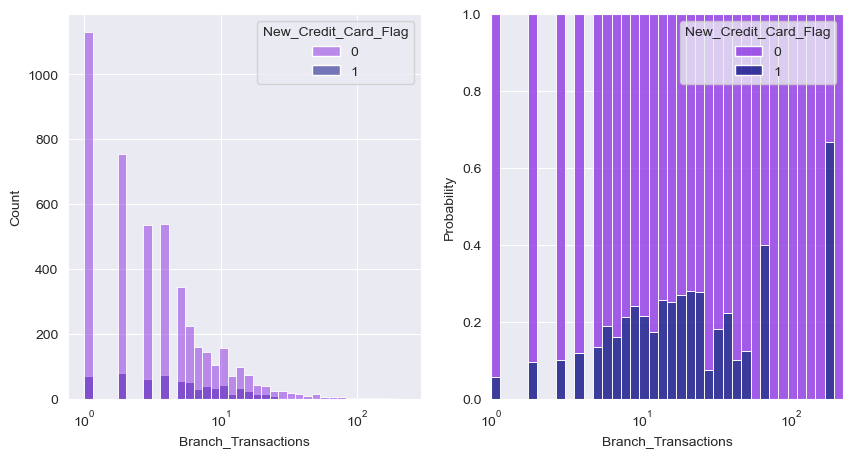

In [23]:
plt.figure(figsize = (10,5))
plt.subplot(1, 2, 1)
sns.histplot(data = data[data['Branch_Transactions'] > 0], x = "Branch_Transactions", hue = "New_Credit_Card_Flag",
             log_scale = True, kde=False, multiple="layer", stat="count")
plt.subplot(1, 2, 2)
sns.histplot(data = data[data['Branch_Transactions'] > 0], x = "Branch_Transactions", hue = "New_Credit_Card_Flag",
             log_scale = True, kde=False, multiple="fill", stat="probability")
plt.show()

Počet transakcí provedených klienty na pobočce banky **pozitivně ovlivňuje** pravděpodobnost zřízení kreditní karty.

#### ATM_Transactions

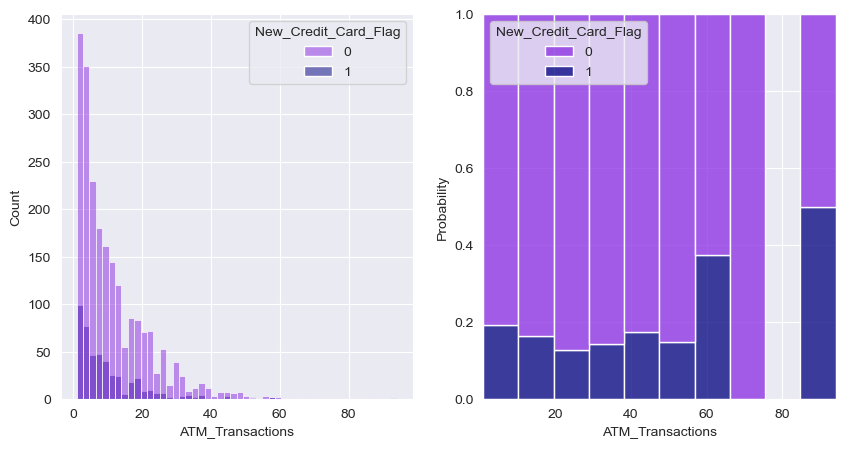

In [24]:
plt.figure(figsize = (10,5))
plt.subplot(1, 2, 1)
sns.histplot(data = data[data['ATM_Transactions'] > 0], x = "ATM_Transactions", hue = "New_Credit_Card_Flag",
             log_scale = False, kde=False, multiple="layer", stat="count")
plt.subplot(1, 2, 2)
sns.histplot(data = data[data['ATM_Transactions'] > 0], x = "ATM_Transactions", hue = "New_Credit_Card_Flag",
             log_scale = False, kde=False, multiple="fill", stat="probability", bins = 10)
plt.show()

Z výše uvedených histogramů je patrné, že **počet transakcí** přes bankomat téměř **nemá žádný vliv** na pravděpodobnost zřízení kreditní karty. Protože bez ohledu na počet transakcí zůstává procento zákazníků s kreditní kartou zhruba konstantní s výjimkou dvou intervalů.   
Použití bankomatu však samo o sobě *zvyšuje pravděpodobnost* zřízení kreditní karty.  

#### Phone_Transactions

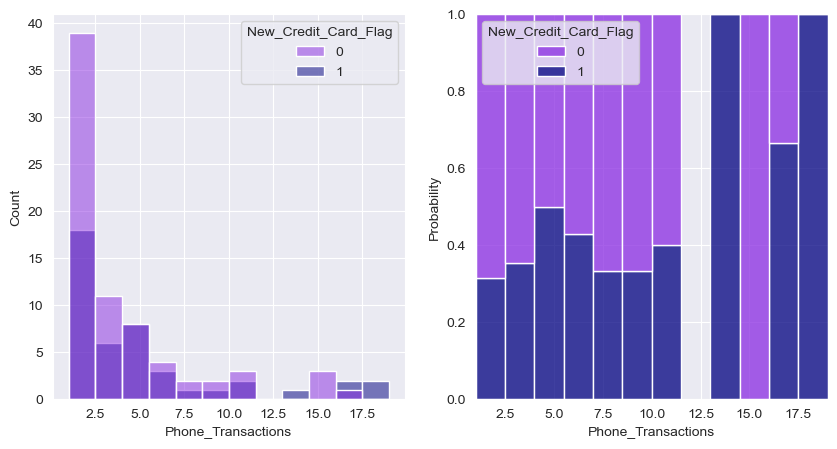

In [25]:
plt.figure(figsize = (10,5))
plt.subplot(1, 2, 1)
sns.histplot(data = data[data['Phone_Transactions'] > 0], x = "Phone_Transactions", hue = "New_Credit_Card_Flag",
             log_scale = False, kde=False, multiple="layer", stat="count")
plt.subplot(1, 2, 2)
sns.histplot(data = data[data['Phone_Transactions'] > 0], x = "Phone_Transactions", hue = "New_Credit_Card_Flag",
             log_scale = False, kde=False, multiple="fill", stat="probability")
plt.show()

Počet telefonických hovorů s pracovníky banky má pozitivní dopad, ale je příliš málo klientů *(1.1%)*, kteří tento typ komunikace využívají, než aby z toho bylo možné vyvodit odpovídající závěry.

#### Internet_Transactions

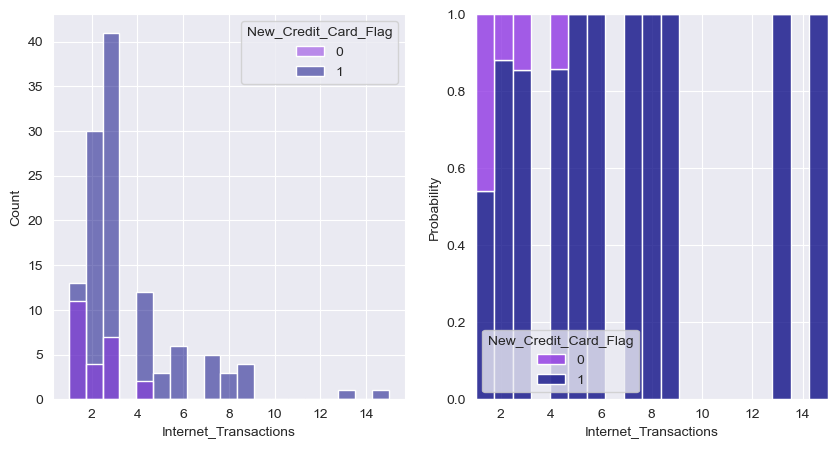

In [26]:
plt.figure(figsize = (10,5))
plt.subplot(1, 2, 1)
sns.histplot(data = data[data['Internet_Transactions'] > 0], x = "Internet_Transactions", hue = "New_Credit_Card_Flag",
             log_scale = False, kde=False, multiple="layer", stat="count")
plt.subplot(1, 2, 2)
sns.histplot(data = data[data['Internet_Transactions'] > 0], x = "Internet_Transactions", hue = "New_Credit_Card_Flag",
             log_scale = False, kde=False, multiple="fill", stat="probability")
plt.show()

Komunikace prostřednictvím internetu je jednoznačně **silným prediktorem**, ale v tomto datasetě ji využívá pouze *1.4%* uživatelů banky. 

#### Total_Transactions

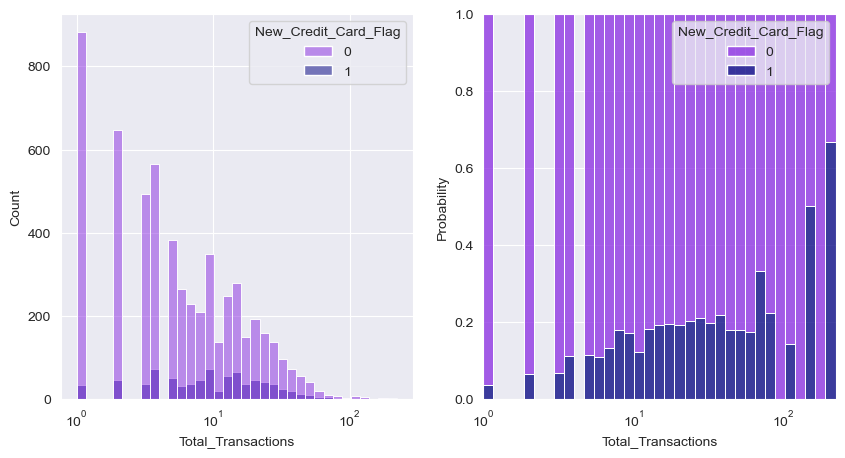

In [27]:
plt.figure(figsize = (10,5))
plt.subplot(1, 2, 1)
sns.histplot(data = data[data['Total_Transactions'] > 0], x = "Total_Transactions", hue = "New_Credit_Card_Flag",
             log_scale = True, kde=False, multiple="layer", stat="count")
plt.subplot(1, 2, 2)
sns.histplot(data = data[data['Total_Transactions'] > 0], x = "Total_Transactions", hue = "New_Credit_Card_Flag",
             log_scale = True, kde=False, multiple="fill", stat="probability")
# plt.savefig('ToatalTransactions_histogramy.png', dpi = 1000)
plt.show()

Tento atribut je generován ze všech atributů popisujících komunikaci s bankou. 
Ve skutečnosti se jedná o součet všech komunikačních případů jednotlivých klientů.  
Pravý histogram jasně ukazuje, že **s rostoucím počtem interakcí zákazníka s bankou roste pravděpodobnost založení kreditní karty.** 


----

## Příprava dat a modelování

Binarizace kategoriální proměnné `Gender`.

In [28]:
data = data.replace({'Gender': {'M': 0, 'F': 1}})

### Korelační matice
Vytvoření korelační matice a její vizualizace prostřednictvím heatmapy.

In [29]:
# Tvorba korelační matice
corr_matrix = np.triu(data.loc[:,].corr())

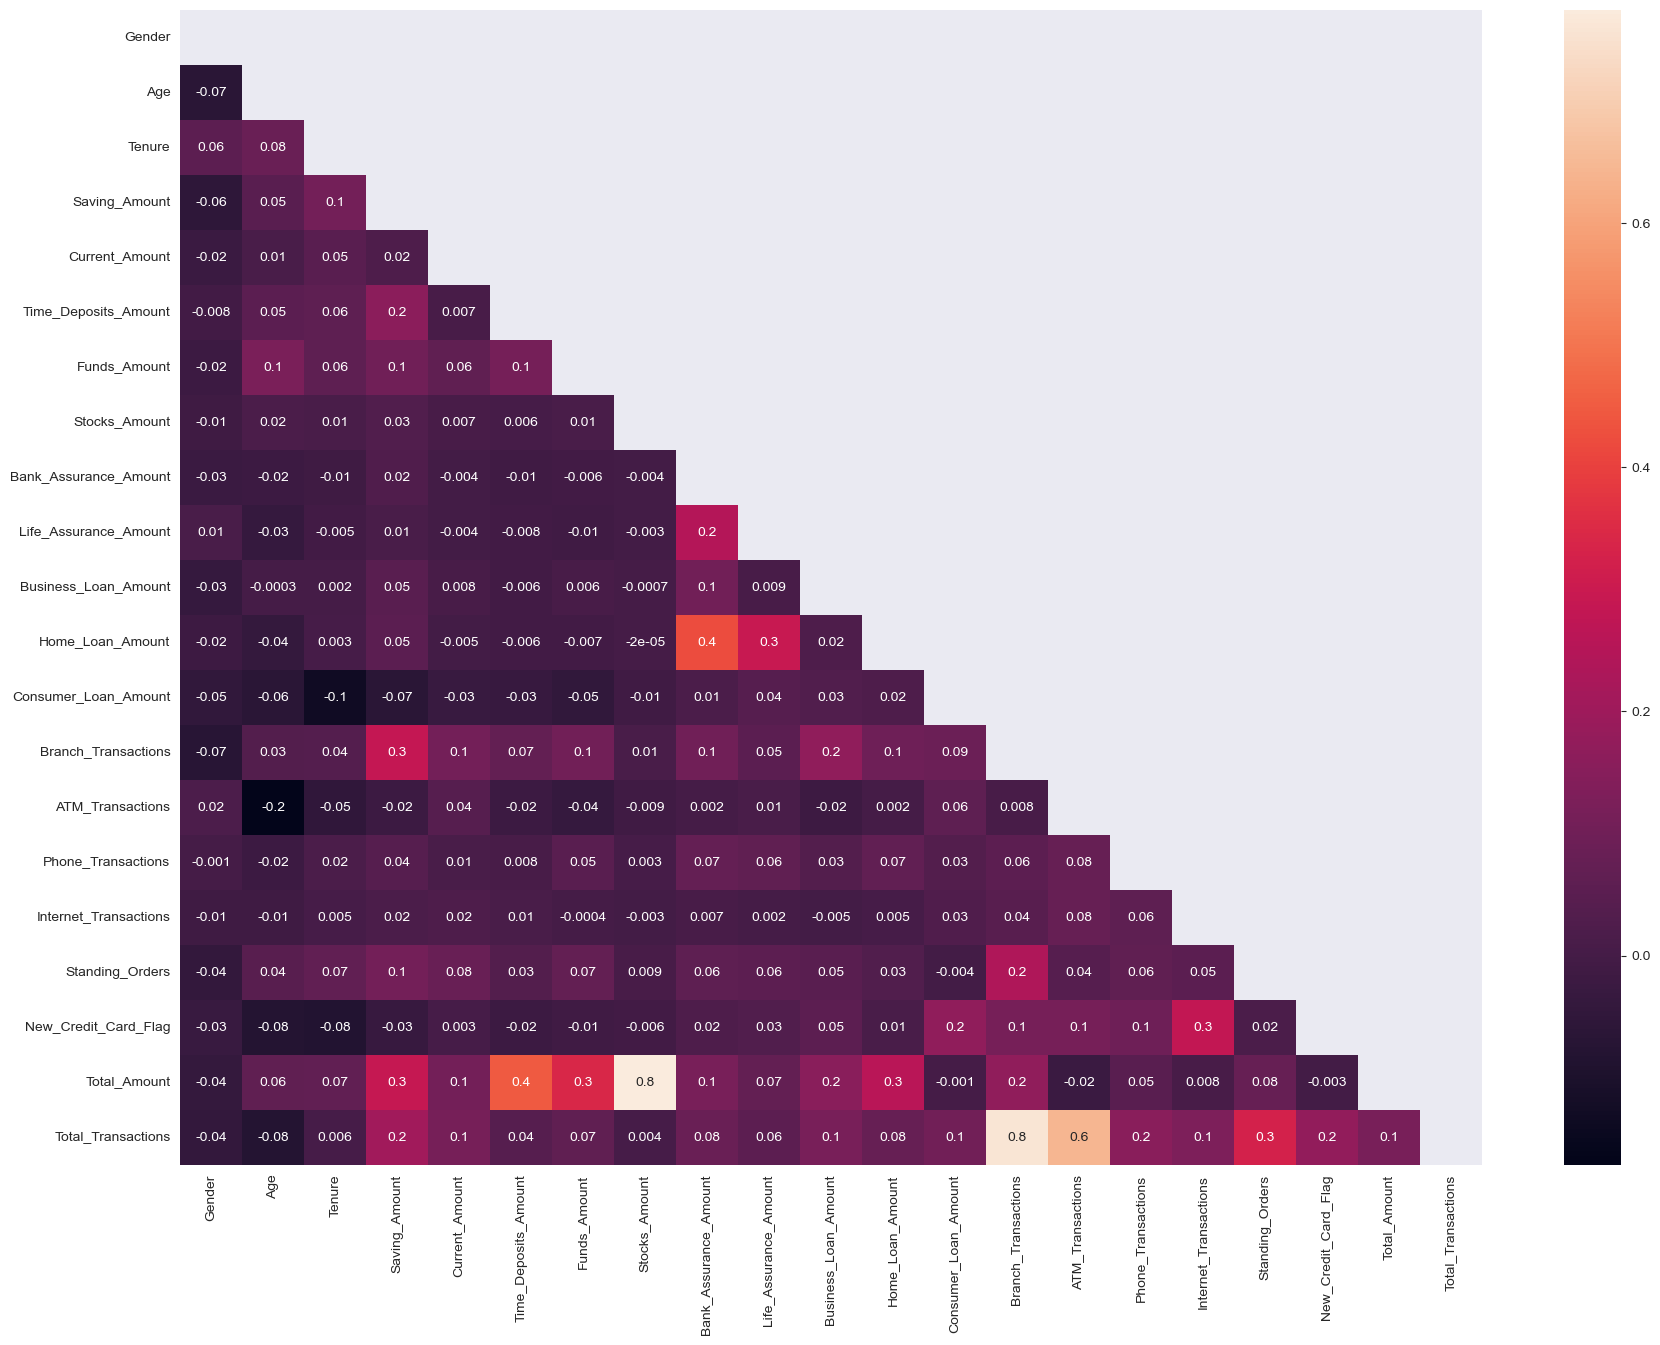

In [30]:
# Použití heatmap k vizualizaci korelační matice
plt.figure(figsize = (21,15))
sns.heatmap(data.loc[:,].corr(), annot=True, fmt = '.1g', mask = corr_matrix )

#plt.savefig('corr_matrix.png', dpi = 1000)
plt.show()

Dva uměle vytvořené atributy `Total_Amount` a `Total_Transactions` vykazovaly vysoké korelační koeficienty s původními atributy `Stocks_Amount` a ` Branch_Transactions`. 

Aby se zabránilo vstupování duplicitních informací do modelu, byly tyto atributy v následujících krocích vyřazeny. 

In [31]:
data = data.drop(columns = ['Branch_Transactions', 'Stocks_Amount'])

### Rozdělení dat
Data budou rozdělena na trénovací a testovací v poměru `75%` pro trénovací a `25%` pro testovací. Při rozdělení byl použit stratifikační parametr pro vyvážené rozdělení.

Validační data pro ladění hyperparametrů budou nahrazena křížovou validací trénovacích dat pro jednotlivé kombinace parametrů.

In [32]:
from sklearn.model_selection import train_test_split

y = data['New_Credit_Card_Flag']
X = data.drop(columns = ['New_Credit_Card_Flag'])

# 75% train, 25% test - using cross validation for tuning hyperparameters
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42, stratify = y)

print(f"Počet pozorování podle tříd (y_train): {np.bincount(y_train)}")
print(f"Počet pozorování podle tříd (y_test): {np.bincount(y_test)}")

Počet pozorování podle tříd (y_train): [6845  655]
Počet pozorování podle tříd (y_test): [2282  218]


Po rozdělení vidíme, že každou z těchto částí tvoří **9,5%** pozorování minoritní třídy. 

---

### SMOTE and ENN
#### Vybalancování trénovacích dat

Pro vybalancování dat byla použita kombinace `SMOTE` (Synthetic Minority Oversampling Technique) pro oversampling a `ENN` (Edited Nearest Neighbours) pro undersampling.

In [33]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(sampling_strategy = 0.6, random_state = 0, k_neighbors = 2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train) 

print(f'Before OverSampling, counts of label 1: {sum(y_train==1)}')
print(f'Before OverSampling, counts of label 0: {sum(y_train==0)}')
print(f'After OverSampling, counts of label 1: {sum(y_train_res == 1)}')
print(f'After OverSampling, counts of label 0: {sum(y_train_res == 0)}')

Before OverSampling, counts of label 1: 655
Before OverSampling, counts of label 0: 6845
After OverSampling, counts of label 1: 4107
After OverSampling, counts of label 0: 6845


In [34]:
from imblearn.under_sampling import EditedNearestNeighbours

enn = EditedNearestNeighbours(sampling_strategy = 'majority')
X_train, y_train = enn.fit_resample(X_train_res, y_train_res) 

print(f'Before UnderSampling, counts of label 1: {sum(y_train_res==1)}')
print(f'Before UnderSampling, counts of label 0: {sum(y_train_res==0)}')
print(f'After UnderSampling, counts of label 1: {sum(y_train == 1)}')
print(f'After UnderSampling, counts of label 0: {sum(y_train == 0)}')

Before UnderSampling, counts of label 1: 4107
Before UnderSampling, counts of label 0: 6845
After UnderSampling, counts of label 1: 4107
After UnderSampling, counts of label 0: 4923


Po použití vyvažovacích technik v trénovacích datech je poměr nul a jedniček **55% ku 45%**. 

---

#### Standardizace kvantitativních proměnných pomocí Standard Scaler

Standardizace se provádí proto, že různé hodnoty jsou vyjádřeny v různých jednotkách měření. Tento postup umožňuje "spravedlivý boj" mezi atributy při určování jejich důležitosti.

In [35]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

----

### RandomForest

In [36]:
from sklearn.ensemble import RandomForestClassifier

rfc_1 = RandomForestClassifier(random_state = 42)

### Ladění parametrů 1 kolo - RandomizedSearchCV

Hyperparametry lze považovat za jakési nastavení modelu. Hyperparametry, které fungují dobře pro jednu sadu dat, nebudou fungovat pro jinou - proto je třeba je optimalizovat.

Nastavení parametrů jsme rozdělili do dvou kol. V prvním kroku používáme `RandomizedSearchCV`, který umožňuje poměrně hrubě zkoumat široké spektrum hodnot hyperparametrů.

In [37]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = list(range(10, 110, 10))
max_features = ['log2', 'sqrt']
max_depth = list(range(1, 16))
min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
min_samples_leaf = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
bootstrap = [True, False]
class_weight = ['balanced', 'balanced_subsample']

Připravili jsme slovník (`param_dist`) obsahující názvy hyperparametrů, které budeme ladit, a seznamy jejich hodnot.

In [38]:
param_dist = {'n_estimators': n_estimators,
              'max_features': max_features,
              'max_depth': max_depth,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf,
              'bootstrap': bootstrap,
              'class_weight': class_weight}

Dále inicializujeme objekt `rs` pomocí funkce `RandomizedSearchCV()` a předáváme mu:
- model RandomForest,
- `param_dist`,
- počet iterací (`n_iter`),
- počet křížových validací, které se mají provést.

Hyperparametr `n_jobs` umožňuje určit, kolik procesorových jader je potřeba k provozu modelu. Nastavení `n_jobs` na `-1` způsobí, že model poběží rychleji, protože využije všechna jádra procesoru.

In [39]:
rs = RandomizedSearchCV(rfc_1, 
                        param_dist, 
                        n_iter = 100, 
                        cv = 5, 
                        verbose = 1, 
                        n_jobs = -1, 
                        random_state = 0)

Při hodnotách parametrů `n_iter = 100` a `cv = 5` jsme náhodně zvolenými kombinacemi výše uvedených hyperparametrů vytvořili 500 modelů RF. 

Můžeme nahlédnout do atributu `best_params_` a získat informace o sadě hyperparametrů, která nám umožní vytvořit nejlepší model.

In [40]:
rs.fit(X_train, y_train)
rs.best_params_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


{'n_estimators': 80,
 'min_samples_split': 2,
 'min_samples_leaf': 7,
 'max_features': 'log2',
 'max_depth': 14,
 'class_weight': 'balanced',
 'bootstrap': False}

Abychom mohli podrobně prozkoumat kvalitu použitých hyperparametrů, vytvoříme dataframe `rs_df`, do kterého vložíme všech 500 iterací s různými kombinacemi a výsledné metriky `mean_test_score`. 

In [41]:
rs_df = pd.DataFrame(rs.cv_results_).sort_values('rank_test_score').reset_index(drop=True)
rs_df = rs_df.drop([
            'mean_fit_time', 
            'std_fit_time', 
            'mean_score_time',
            'std_score_time', 
            'params', 
            'split0_test_score', 
            'split1_test_score', 
            'split2_test_score',
            'split3_test_score',
            'split4_test_score'], axis=1)

rs_df.head(10)

,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_class_weight,param_bootstrap,mean_test_score,std_test_score,rank_test_score
0,80,2,7,log2,14,balanced,False,0.899668,0.020819,1
1,70,12,2,sqrt,13,balanced_subsample,True,0.897121,0.020969,2
2,20,23,7,sqrt,15,balanced,False,0.896456,0.023243,3
3,70,2,2,log2,11,balanced,True,0.892137,0.017974,4
4,70,23,7,log2,15,balanced_subsample,True,0.887375,0.018206,5
5,30,7,12,log2,13,balanced,False,0.882946,0.019494,6
6,40,44,7,sqrt,12,balanced_subsample,False,0.881285,0.020225,7
7,40,34,7,log2,11,balanced,False,0.880620,0.019481,8
8,40,50,12,log2,14,balanced,False,0.880066,0.020395,9
9,100,12,18,log2,14,balanced_subsample,False,0.879956,0.016095,10


Nyní vytvořte sloupcové grafy s hodnotami hyperparametrů na ose X a `mean_test_score` na ose Y. 

To nám umožní pochopit, které hodnoty hyperparametrů jsou v průměru nejlépe funkční.

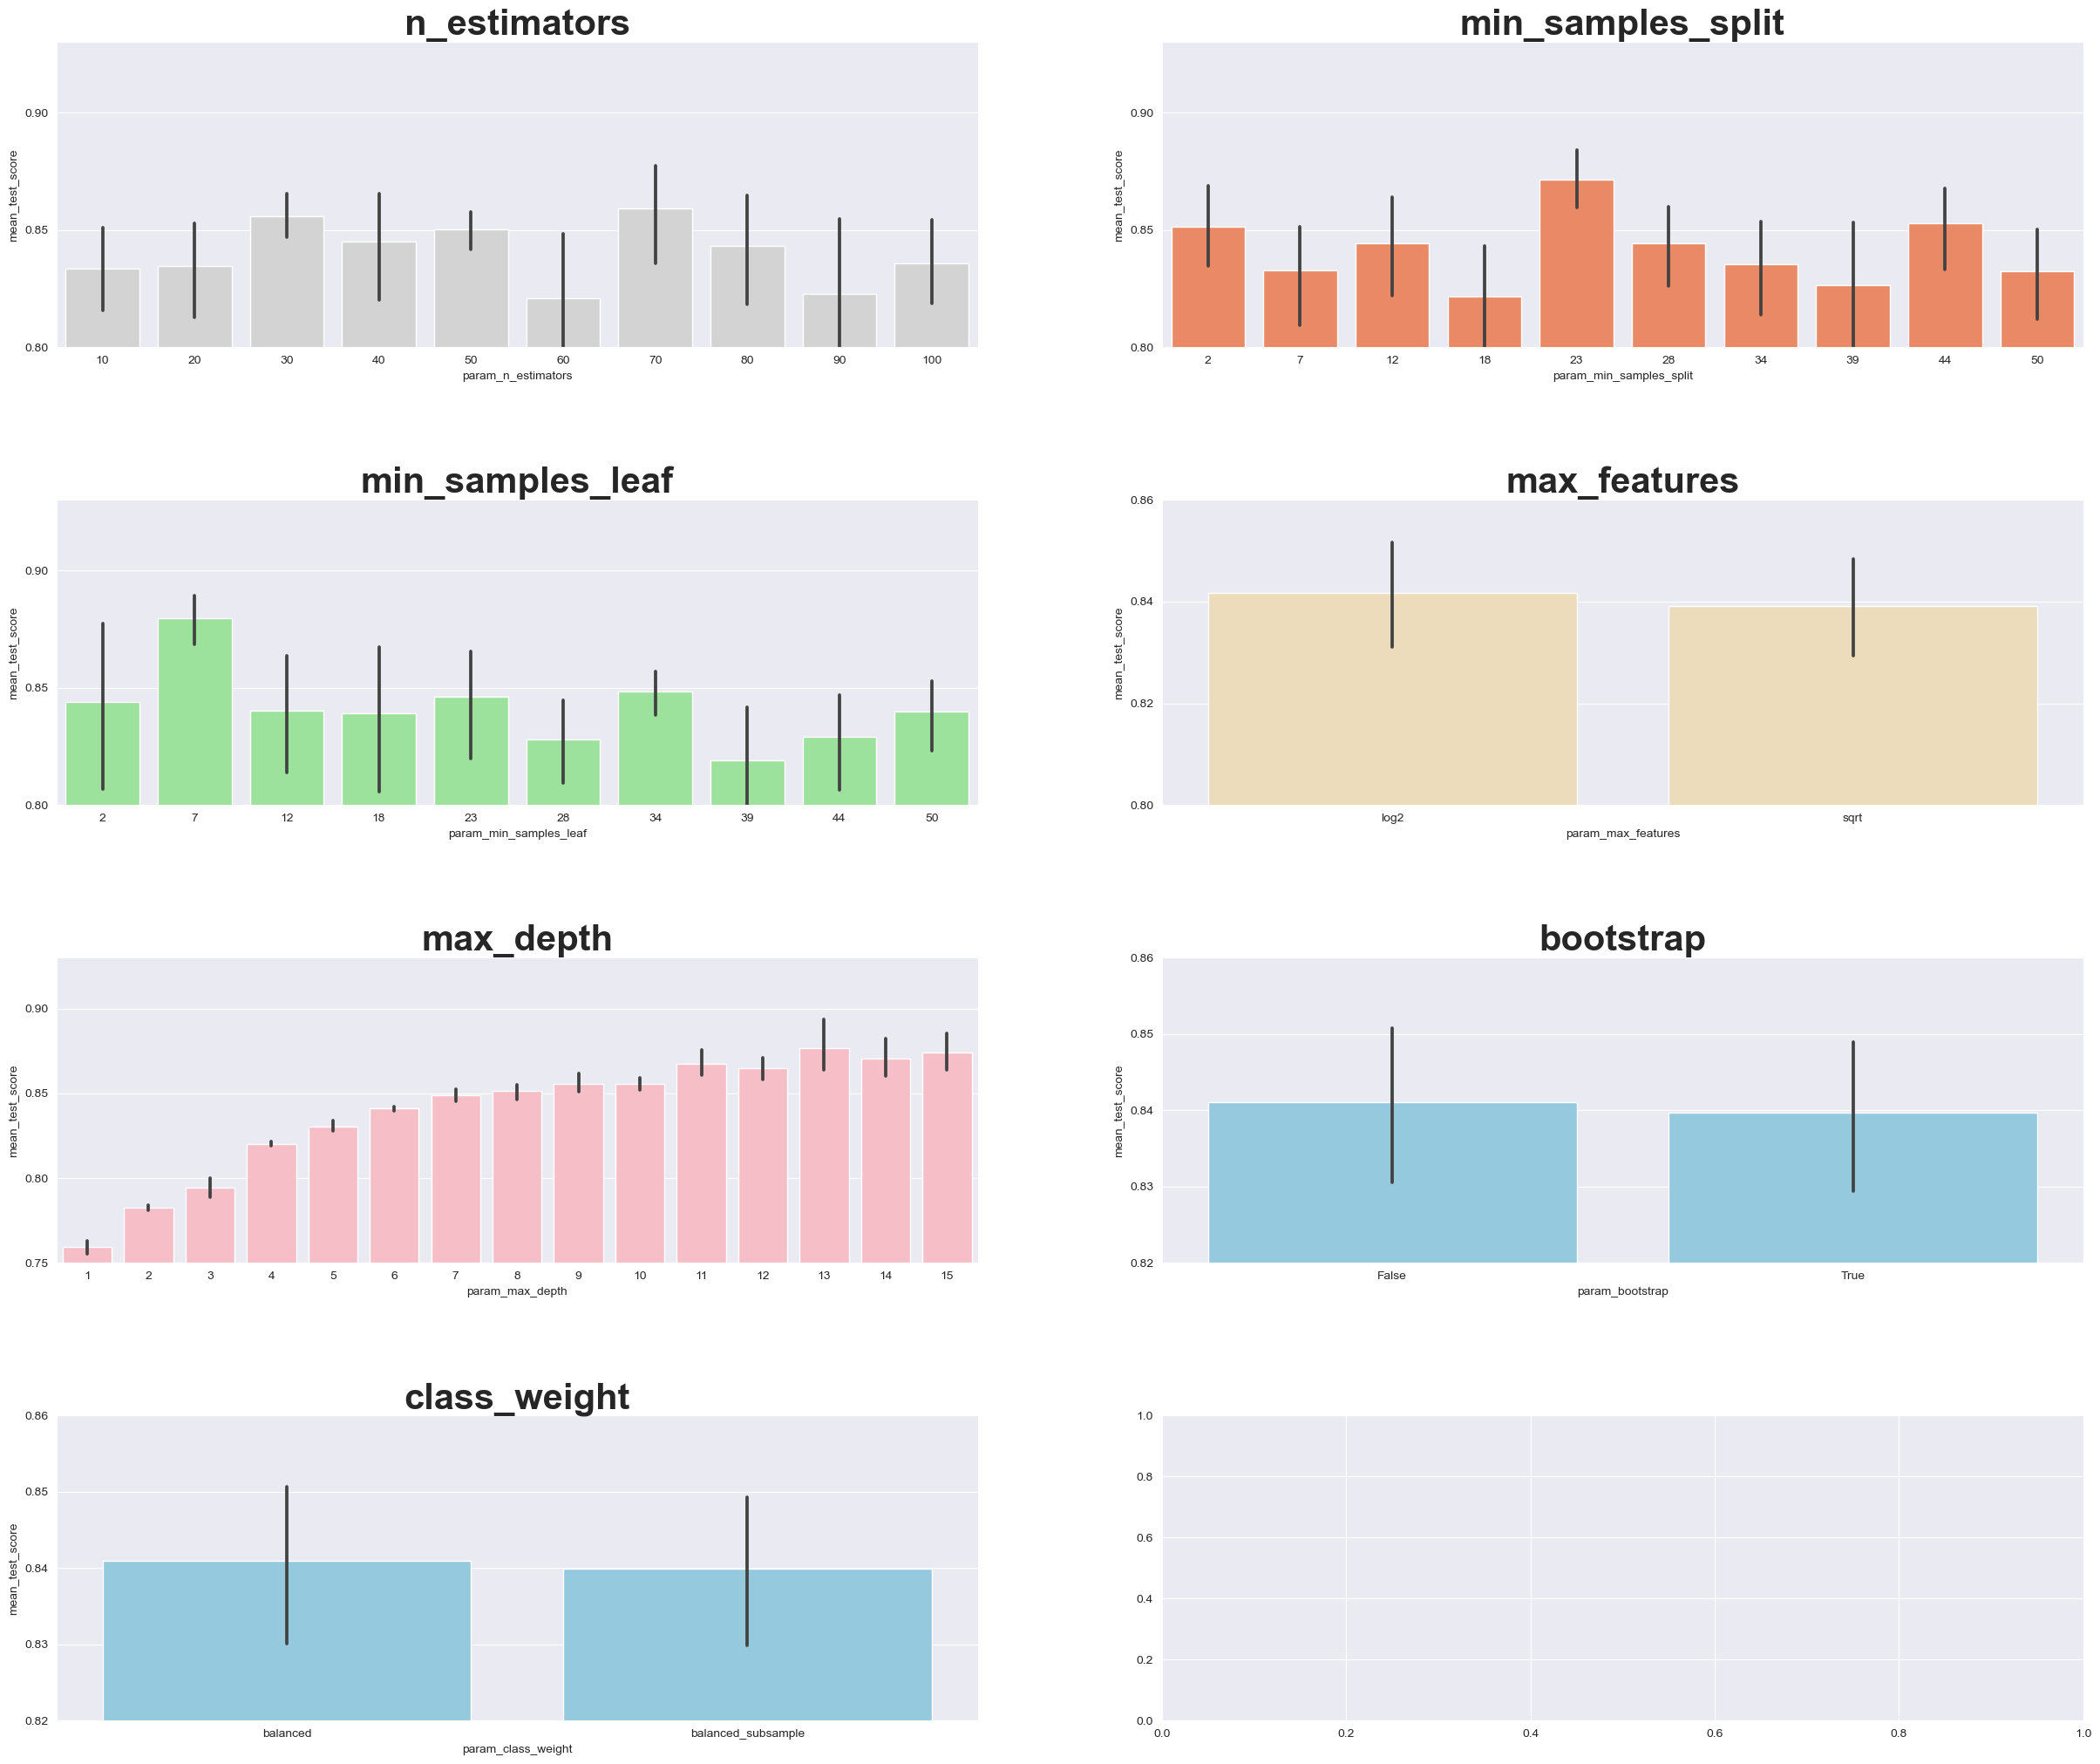

In [42]:
fig, axs = plt.subplots(ncols= 2, nrows = 4)
sns.set(color_codes=True, font_scale = 2)
fig.set_size_inches(30,25)
plt.subplots_adjust(hspace= 0.5)

sns.barplot(x='param_n_estimators', y='mean_test_score', data=rs_df, ax=axs[0,0], color='lightgrey')
axs[0,0].set_ylim([.80,.93])
axs[0,0].set_title(label = 'n_estimators', size=30, weight='bold')

sns.barplot(x='param_min_samples_split', y='mean_test_score', data=rs_df, ax=axs[0,1], color='coral')
axs[0,1].set_ylim([.80,.93])
axs[0,1].set_title(label = 'min_samples_split', size=30, weight='bold')

sns.barplot(x='param_min_samples_leaf', y='mean_test_score', data=rs_df, ax=axs[1,0], color='lightgreen')
axs[1,0].set_ylim([.80,.93])
axs[1,0].set_title(label = 'min_samples_leaf', size=30, weight='bold')

sns.barplot(x='param_max_features', y='mean_test_score', data=rs_df, ax=axs[1,1], color='wheat')
axs[1,1].set_ylim([.80,.86])
axs[1,1].set_title(label = 'max_features', size=30, weight='bold')

sns.barplot(x='param_max_depth', y='mean_test_score', data=rs_df, ax=axs[2,0], color='lightpink')
axs[2,0].set_ylim([.75,.93])
axs[2,0].set_title(label = 'max_depth', size=30, weight='bold')

sns.barplot(x='param_bootstrap',y='mean_test_score', data=rs_df, ax=axs[2,1], color='skyblue')
axs[2,1].set_ylim([.82,.86])
axs[2,1].set_title(label = 'bootstrap', size=30, weight='bold')

sns.barplot(x='param_class_weight', y='mean_test_score', data=rs_df, ax=axs[3,0], color='skyblue')
axs[3,0].set_ylim([.82,.86])
axs[3,0].set_title(label = 'class_weight', size=30, weight='bold')


plt.show()

Díky vizualizaci můžeme snadno vybrat nejlepší kombinace hyperparametrů pro následné ladění pomocí `GridSearchCV`.

---

### Ladění parametrů 2 kolo - GridSearchCV

Po použití algoritmu `RandomizedSearchCV` použijeme algoritmus `GridSearchCV` k přesnějšímu výběru nejlepší kombinace hyperparametrů. 

Zde se zkoumají stejné hyperparametry, ale nyní použijeme "hlubší" vyhledávání. V algoritmu `GridSearchCV` se zkoumají **všechny kombinace hyperparametrů**. To vyžaduje mnohem více výpočetních prostředků než použití algoritmu `RandomizedSearchCV`, kde počet iterací hledání nastavujeme sami.

In [43]:
from sklearn.model_selection import GridSearchCV

n_estimators = [30, 70]
max_features = ['log2']
max_depth = [13]
min_samples_split = [2, 23, 44]
min_samples_leaf = [7]
bootstrap = [False]
class_weight = ['balanced']

param_grid = {'n_estimators': n_estimators,
              'max_features': max_features,
              'max_depth': max_depth,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf,
              'bootstrap': bootstrap,
              'class_weight': class_weight}

Zde použijeme křížovou validaci ve 5 blocích pro 6 (2 x 1 x 1 x 3 x 1 x 1 x 1) cyklů trénování modelu, což představuje **30 iterací** trénování modelu.

V atributu `best_params_` zjistíme, které hodnoty hyperparametrů umožňují modelu nejlépe pracovat se zkoumaným souborem dat.

In [44]:
gs = GridSearchCV(rfc_1, param_grid, cv = 5, verbose = 1, n_jobs= -1)

gs.fit(X_train, y_train)
gs.best_params_

Fitting 5 folds for each of 6 candidates, totalling 30 fits


{'bootstrap': False,
 'class_weight': 'balanced',
 'max_depth': 13,
 'max_features': 'log2',
 'min_samples_leaf': 7,
 'min_samples_split': 2,
 'n_estimators': 30}

----

### Vytvoření modelu na testovacích datech 

Po získání nejlepších parametrů inicializujeme algoritmus náhodných lesů a poté použijeme testovací část dat pro klasifikaci.

In [45]:
# Iniciace modelu s nejlepšími parametry
rfc_2 = gs.best_estimator_

In [46]:
# Predikce
y_pred = rfc_2.predict(X_test)

Pro vyhodnocení výsledného modelu vytvoříme `confusion_matrix` a odvodíme různé koeficienty acuuracy.  

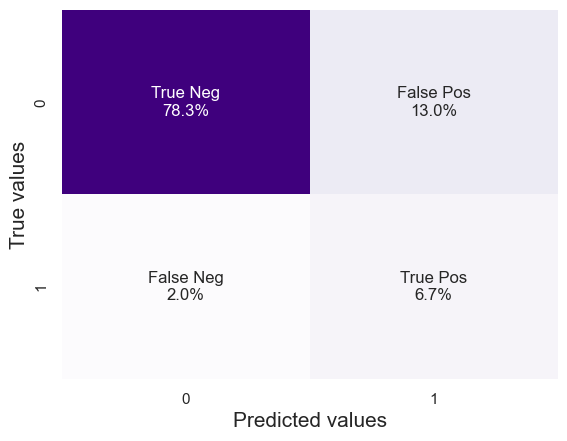

Test acuuracy: 0.85
Accuracy s vahami: 1718.73$
Recall: 0.77
Precision: 0.34
F1_score: 0.47


In [47]:
from sklearn.metrics import confusion_matrix, accuracy_score

cf_matrix = confusion_matrix(y_test, y_pred)

group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_percentages = ['{0:.1%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names, group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.set()
sns.heatmap(cf_matrix, annot = labels, fmt = '', cbar = False, cmap = 'Purples')
plt.rcParams['font.size'] = '15'
plt.xlabel('Predicted values', fontsize = 15)
plt.ylabel('True values', fontsize = 15)
#plt.savefig('confusion_matrix.png', dpi = 1000)
plt.show()

# vahy
TP = (1000 * 0.2) / 365 * 30 - 0.5
FN = 0.5 - (1000 * 0.2) / 365 * 30
FP = -0.5

# ruzne metriky
precision = cf_matrix[1,1] / sum(cf_matrix[:,1])
recall = cf_matrix[1,1] / sum(cf_matrix[1,:])
f1_score = 2 * precision * recall / (precision + recall)
accuraacy = accuracy_score(y_test, y_pred)
accuracy_vahy = TP * cf_matrix[1,1] + FP * cf_matrix[0,1] + FN * cf_matrix[1,0]

print(f'Test acuuracy: {round(accuraacy, 2)}')
print(f'Accuracy s vahami: {round(accuracy_vahy, 2)}$')
print(f'Recall: {round(recall, 2)}')
print(f'Precision: {round(precision, 2)}')
print(f'F1_score: {round(f1_score, 2)}')

Pro lepší interpretaci výsledků klasifikace jsme se rozhodli použít metriku `Accuracy s váhami`:

`Accuracy_vahy = TP * cf_matrix[1,1] + FP * cf_matrix[0,1] + FN * cf_matrix[1,0]`

Váhy byly vypočteny podle vzorců : 

- True positive: `TP = (a * b) / 365 * 30 - 0.5`
- False negative: `FN = 0.5 - (a * b) / 365 * 30`
- False positive: `FP = -0.5`

Kde:
- `a` = částka, kterou klient utrácí (1000$),
- `b` = úroková sazba (0.2),
- `0.5` je fixní náklad na oslovení jednoho klienta 

Podle námi zvolených parametrů, každý správně klasifikovaný uživatel kreditní karty přináší měsíční výnos ve výši **15.9 USD**.  Ale každý zákazník, který má kreditní kartu, ale není rozpoznán naším modelem, představuje ušlý zisk => implicitní náklady ve výši **-15,9 USD**. Klienti nesprávně klasifikovaní jako držitelé kreditních karet pro nás představují náklady vynaložené na komunikaci (např. rozesílání propagačních informací). Používáme fixní částku ve výši **50 centů**. 

K hodnocení používáme také křivku `ROC` a metriku `AUC`.

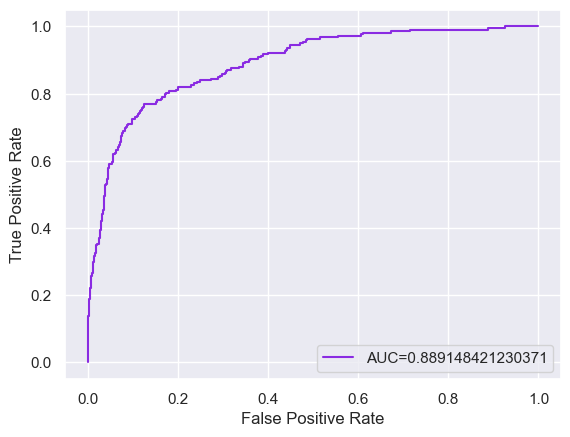

In [48]:
sns.set_style('darkgrid')
sns.set_palette(palette=['blueviolet', 'navy'])

# ROC and AUC
from sklearn.metrics import roc_curve, roc_auc_score

# define metrics
y_pred_proba = rfc_2.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr, tpr, label = "AUC=" + str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
#plt.savefig('ROC.png', dpi = 1000)
plt.show()

Plocha pod křivkou nabývá hodnoty **0.889**, což je velmi dobré. Pro účely takovéto predikce (např. při stanovení optimálního thresholdu) je rozumné se soustředit především na `recall`, resp. upřednostnit **vyšší True Positive Rate** na úkor **vyššího False Positive Rate**, neboť usuzujeme, že zacílit se na pár klientů, kteří nemají zájem o kartu přinese stále nižší ztrátu, než-li přehlédnout klienta, který by o kartu zájem měl.

Pro podrobnější porozumění modelu vytvoříme graf zobrazující nejdůležitější atributy seřazené sestupně na vodorovném sloupcovém grafu.

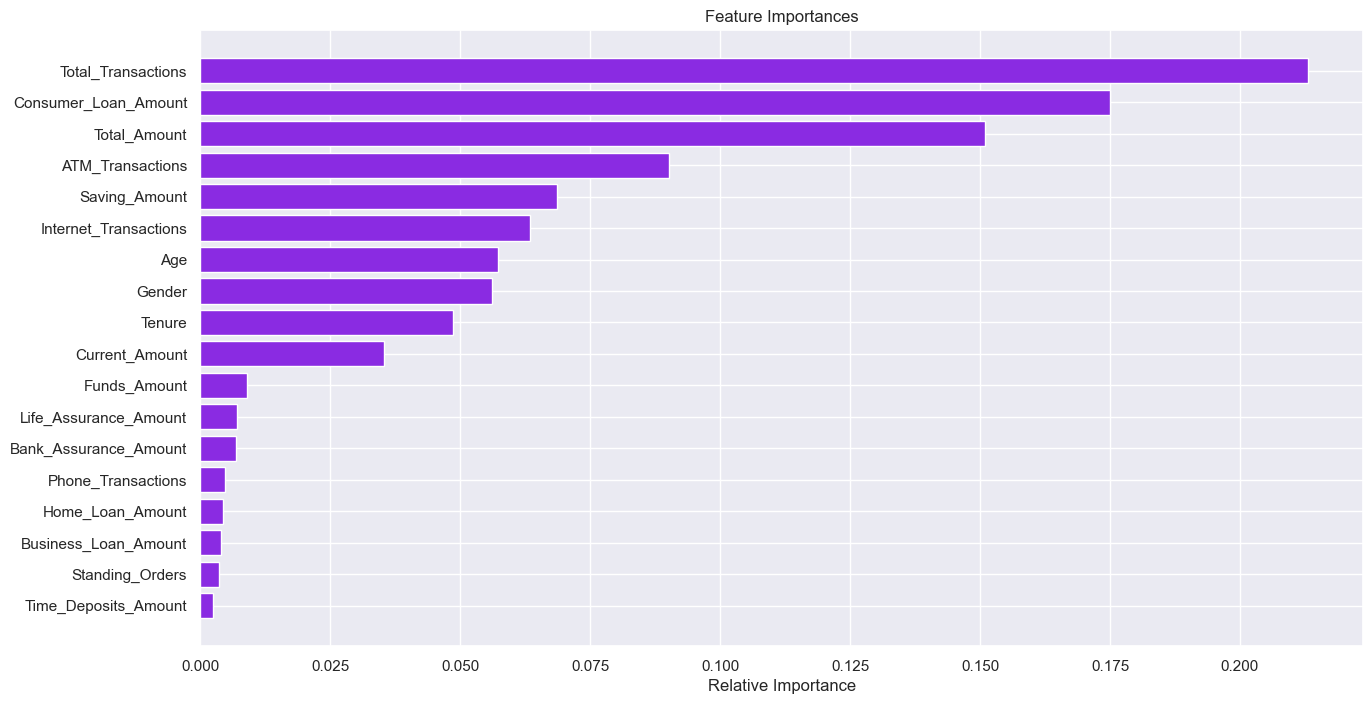

In [49]:
features = X.columns.values.tolist()
importances = rfc_2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize = (15,8))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
# plt.savefig('Feature_Importances.png', dpi = 1000)
plt.show()

Z grafu lze vypozorovat následující:
- Dva uměle vytvořené atributy `Total_Transactions` a `Total_Amount` představují jedny z nejvíce důležitých atributů pro úspěšnou predikci modelem.
- Vysoké umístění atributů `Consumer_Loan_Amount` a `Saving_Amount` potvrzuje předpoklad z předchozí deskriptivní statistiky o tom, že díky jejich vysoké korelaci mají na cílovou proměnnou pravděpodobně silný vliv.

# Závěr
Cílem práce bylo vytvořit binární klasifikační model, který by na základě dostupných dat o klientech banky predikoval založení kreditní karty.

K dosažení cíle byl použit algoritmus náhodného lesa. Aby byl model dostatečně kvalitní a dosahoval požadovaných výstupů, bylo nejprve nezbytné porozumnět datům prostřednictvím deskriptivní statistiky a data adekvátně předzpracovat.

Dataset byl velmi nevyvážený obsahující pouze jeden kategoriální atribut a žádné chybějící hodnoty. Z hlediska vztahů k cílové proměnné byla v případě produktů vypozorována negativní závislost u `Saving_Amount` a silná pozitivní závislost u `Consumer_Loan_Amount`.  
Pokud jde o různé komunikační kanály mezi zákazníky a bankou, bylo zjištěno, že samotná komunikace má pozitivní vliv na ochotu zákazníka založit si kreditní kartu. To má však i druhou stránku: možná, že samotná kreditní karta zvyšuje komunikační aktivitu zákazníků. K dosažení přesnějších závěrů je zapotřebí dalšího výzkumu, který by porovnal aktivity zákazníků před a po založení kreditní karty.

V rámci předzpracování dat byla provedena binarizace kategoriální proměnné `Gender`, vytvořeny 2 nové umělé atributy `Total_Amount` a `Total_Transactions`, vyřazeny 2 původní silně korelované vysvětlující atributy a provedena standardizace všech vysvětlujících atributů použitých k sestavení modelu. Data byla rozdělena v poměru 75/25. Nevyváženost cílové proměnné byla vyřešena kombinací algoritmů SMOTE (oversampling) a ENN (undersampling).

Ladění hyperparametrů náhodného lesa bylo řešeno 5-násobnou křížovou validací ve 2 fázích (nejprve selekcí nejlepších náhodně výbraných kombinací parametrů a poté jejich srovnáním pro získání jedné nejlepší kombinace pro finální model).

Pro vyhodnocení modelu byla využita matice záměn s metriky Accuracy, Recall, Precision, F1_score a ROC křivka.
Výsledky byly uspokojující s hodnotami accuracy 0.85 a AUC 0.89. Jinou perspektivu, také znázorňovala metrika accuracy s váhami, která penalizovala vyšší False negative, a tudíž vyzdvihla důležitost metriky recall pro tuto úlohu.

Naše doporučení k další analýze: 

1) podrobně prozkoumat vztah mezi atributy odpovědnými za komunikaci a cílovým atributem ve smyslu, zda má komunikace pozitivní vliv na založení kreditní karty, a nikoli naopak.   
2) pokud se potvrdí hypotéza o pozitivním vlivu (komunikace -> kreditní karta), pak se zaměřit na zlepšení zákaznické péče, a tím zvýšit počet a kvalitu komunikačních případů, což bude mít následně pozitivní vliv na počet založených kreditních karet.